# FlipItNews

The Gurugram-based company ‘FlipItNews’ aims to revolutionize the way Indians perceive finance, business, and capital market investment, by giving it a boost through artificial intelligence (AI) and machine learning (ML). They’re on a mission to reinvent financial literacy for Indians, where financial awareness is driven by smart information discovery and engagement with peers. Through their smart content discovery and contextual engagement, the company is simplifying business, finance, and investment for millennials and first-time investors

**Objective:**

The goal of this project is to use a bunch of news articles extracted from the companies’ internal database and categorize them into several categories like politics, technology, sports, business and entertainment based on their content. Use natural language processing and create & compare at least three different models.

**Attribute Information:**

Article

Category

### Concepts used in this Notebook

1.   Natural Language Processing
2.   Text Processing
3.   Stopwords, Tokenization, Lemmatization
4.   Bag of Words, TF-IDF
5.   Multi-class Classification using Random Forest , Naive Baye's , ,Decision Tree

### Importing Libraries

In [1]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Importing Dataset

In [2]:
!gdown 11E02Q7JdKp-7y8OjIR-yMvZ28c7wE1Ye
df = pd.read_csv('flipitnews-data.csv')

Downloading...
From: https://drive.google.com/uc?id=11E02Q7JdKp-7y8OjIR-yMvZ28c7wE1Ye
To: /content/flipitnews-data.csv
100% 5.06M/5.06M [00:00<00:00, 64.3MB/s]


In [3]:
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
df.shape

(2225, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [6]:
df.isna().sum()

Category    0
Article     0
dtype: int64

### Text Analysis- Category

<Axes: >

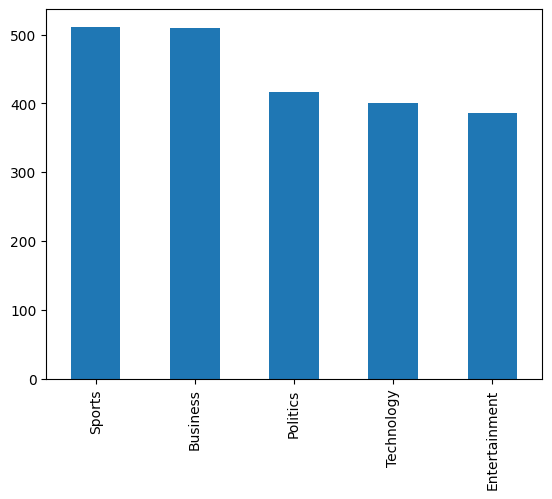

In [7]:
df['Category'].value_counts().plot(kind='bar')

We can see that the sports and business have highest no of articles and Entertainment has lowest

### Text Preprocessing

1. removing Can't - can not to have , you're to you are - Expanding word contractions

### Lemmatization and Stop words and Expaning word contraction usin nltk

In [8]:
import nltk
import re

from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
#--------
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
!pip install contractions
import contractions

In [12]:
import spacy
words=[]
# Load the English model in spaCy
nlp = spacy.load('en_core_web_sm')

def preprocess(text):

    # Expand Contractions - Eg. you're to you are
    text = contractions.fix(text)

    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [13]:
df['preprocessed_txt'] = df['Article'].apply(preprocess)

### Target feature encoding

In [14]:
#Add the new column which gives a unique number to each of these labels
df['Category_encoded'] = df['Category'].map({
    'Sports' : 0,
    'Business': 1,
    'Politics': 2,
    'Technology': 3,
    'Entertainment': 4
})

#checking the results
df.head(5)

,Category,Article,preprocessed_txt,Category_encoded
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system pl...,3
1,Business,worldcom boss left books alone former worldc...,worldcom boss leave book worldcom boss ber...,1
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester rush m...,0
3,Sports,yeading face newcastle in fa cup premiership s...,yeade face newcastle fa cup premiership newcas...,0
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean s raid box office ocean s crime caper ...,4


### Train test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_txt'], df['Category_encoded'], test_size=0.25)

In [16]:

X_test.shape

(557,)

In [17]:
%%script false --no-raise-error
# @title This cell wont run
# Stemming
corpus=[]
for i in range(len(X_train)):

  if i in X_train.index:
    text = re.sub('[^a-zA-Z]', ' ', X_train[i])

  text = contractions.fix(corpus)
  # lowercase the tweets
  text= text.lower()

  # split the reviews
  text=text.split()

  # stemming and stopwords
  text = [stemmer.stem(word) for word in text if not word in stopwords.words('english')]
  text=' '.join(text)
  corpus.append(text)

### Tokenization using Spacy

In [18]:
# nltk tokenize

'''words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))'''

'words=[]\nfor sent in corpus:\n    sent_token=sent_tokenize(sent)\n    for sent in sent_token:\n        words.append(simple_preprocess(sent))'

In [19]:
%%script false --no-raise-error
# @title This cell wont run

import spacy
words=[]
# Load the English model in spaCy
nlp = spacy.load('en_core_web_sm')

# Text to be tokenized- corpus
# Apply tokenization using spaCy


docs = list(nlp.pipe(corpus))

for doc in docs:
# Apply word tokenization using spaCy
    for token in doc:
      words.append(token.text)

## Model Building using Count vectorizer- Bag of words

In [20]:
corpus=[]
for i in range(len(X_train)):
  if i in X_train.index:
    corpus.append(X_train[i])

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus)
v.vocabulary_



{'tv': 190939,
 'future': 76759,
 'hand': 84654,
 'viewer': 196047,
 'home': 88652,
 'theatre': 184772,
 'system': 180933,
 'plasma': 137450,
 'high': 87307,
 'definition': 51681,
 'digital': 54767,
 'video': 195814,
 'recorder': 150027,
 'move': 120791,
 'living': 108975,
 'room': 157076,
 'way': 198809,
 'people': 134365,
 'watch': 198599,
 'radically': 147564,
 'different': 54525,
 'year': 204687,
 'time': 186265,
 'accord': 7759,
 'expert': 66592,
 'panel': 131759,
 'gather': 78217,
 'annual': 14186,
 'consumer': 43272,
 'electronic': 61292,
 'las': 103892,
 'vegas': 195114,
 'discuss': 55722,
 'new': 124479,
 'technology': 183104,
 'impact': 91736,
 'favourite': 69223,
 'pastime': 133170,
 'lead': 104800,
 'trend': 189428,
 'programme': 144159,
 'content': 43541,
 'deliver': 51943,
 'network': 124226,
 'cable': 29842,
 'satellite': 159477,
 'telecom': 183440,
 'company': 40347,
 'broadband': 27731,
 'service': 165702,
 'provider': 145625,
 'portable': 139846,
 'device': 53971,
 't

In [22]:
#Now generate bag of n gram vector for few sample documents

v.transform(["tiger wary farrell   gamble   leicester rush make bid andy farrell great britain rugby league captain decide switch code    anybody involve process way away go stage    tiger boss john wells tell bbc radio leicester   moment   lot unknown andy farrell   medical situation   go big   big gamble   farrell   persistent knee problem   operation knee week ago expect month leicester saracen believe head list rugby union club interest sign farrell decide 15 man game   union   well believe better play back   initially   m sure step league union involve centre    say well   think england prefer progress position row use rugby league skill forward   jury cross divide   club   balance strike cost gamble option bring ready replacement"]).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

### Bag of words - 1 gram

In [27]:

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [39]:
#1. create a pipeline object
rf1 = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter
     ('Multi NB', RandomForestClassifier())
])

#2. fit with X_train and y_train
rf1.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = rf1.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       123
           1       0.94      0.96      0.95       138
           2       0.93      0.93      0.93       115
           3       0.97      0.94      0.95        96
           4       0.98      0.93      0.95        85

    accuracy                           0.95       557
   macro avg       0.95      0.95      0.95       557
weighted avg       0.95      0.95      0.95       557



### n-grams - 2 gram

In [40]:
#1. create a pipeline object
nb1 = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
nb1.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = nb1.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       123
           1       0.98      0.94      0.96       138
           2       0.93      0.99      0.96       115
           3       0.93      0.98      0.95        96
           4       0.99      0.92      0.95        85

    accuracy                           0.97       557
   macro avg       0.97      0.96      0.96       557
weighted avg       0.97      0.97      0.97       557



### n- grams - 3 grams

In [41]:
#1. create a pipeline object
rf2 = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter
     ('Multi NB', RandomForestClassifier())
])

#2. fit with X_train and y_train
rf2.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = rf2.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       123
           1       0.91      0.97      0.94       138
           2       0.94      0.90      0.92       115
           3       0.96      0.91      0.93        96
           4       0.99      0.92      0.95        85

    accuracy                           0.94       557
   macro avg       0.95      0.94      0.94       557
weighted avg       0.94      0.94      0.94       557



## Model Building using TF-IDF

### TF-IDF - Text to numbers

In [31]:
#let's create the vectorizer and fit the corpus and transform them accordingly

from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)

In [32]:
#let's print the vocabulary

print(v.vocabulary_)

{'tv': 16966, 'future': 7067, 'hand': 7775, 'viewer': 17574, 'home': 8188, 'theatre': 16473, 'system': 16201, 'plasma': 12741, 'high': 8079, 'definition': 4791, 'digital': 5083, 'video': 17563, 'recorder': 13632, 'move': 11262, 'living': 10108, 'room': 14252, 'way': 17809, 'people': 12500, 'watch': 17790, 'radically': 13421, 'different': 5072, 'year': 18229, 'time': 16580, 'accord': 972, 'expert': 6266, 'panel': 12270, 'gather': 7171, 'annual': 1510, 'consumer': 4116, 'electronic': 5773, 'las': 9767, 'vegas': 17485, 'discuss': 5188, 'new': 11557, 'technology': 16342, 'impact': 8518, 'favourite': 6458, 'pastime': 12374, 'lead': 9826, 'trend': 16842, 'programme': 13153, 'content': 4132, 'deliver': 4831, 'network': 11542, 'cable': 3039, 'satellite': 14500, 'telecom': 16364, 'company': 3898, 'broadband': 2835, 'service': 14838, 'provider': 13231, 'portable': 12884, 'device': 5012, 'talk': 16243, 'ce': 3308, 'personal': 12554, 'dvr': 5583, 'pvr': 13325, 'set': 14842, 'box': 2698, 'like': 10

In [33]:
#let's print the idf of each word:

all_feature_names = v.get_feature_names_out()

for word in all_feature_names:

    #let's get the index in the vocabulary
    indx = v.vocabulary_.get(word)

    #get the score
    idf_score = v.idf_[indx]

    print(f"{word} : {idf_score}")

Streaming output truncated to the last 5000 lines.
qrio : 7.430525604644662
quadruple : 7.430525604644662
quagmire : 7.430525604644662
quai : 7.430525604644662
quaid : 7.430525604644662
quaintly : 7.430525604644662
quake : 6.177762636149294
qualifi : 7.025060496536498
qualification : 5.926448207868388
qualified : 6.737378424084716
qualifier : 6.044231243524771
qualify : 5.179233806038167
qualifying : 6.044231243524771
qualitative : 7.430525604644662
quality : 4.134688738640333
qualm : 7.025060496536498
quango : 7.025060496536498
quangos : 6.737378424084716
quantity : 6.331913315976553
quarter : 3.450843950742701
quarterly : 5.7257775124062364
quartet : 5.926448207868388
quartz : 7.430525604644662
quash : 7.430525604644662
quashie : 7.430525604644662
queen : 4.865576247183125
quell : 7.430525604644662
quentin : 6.737378424084716
query : 6.044231243524771
quest : 6.331913315976553
question : 3.387474336810112
questionable : 7.430525604644662
questioning : 6.737378424084716
questionnaire 

In [34]:
#let's print the transformed output from tf-idf
print(transform_output.toarray())

[[0.         0.0205176  0.         ... 0.         0.         0.        ]
 [0.         0.02536362 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


### K neighbors classifier

In [42]:

#1. create a pipeline object
kn1 = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])

#2. fit with X_train and y_train
kn1.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = kn1.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       123
           1       0.96      0.88      0.92       138
           2       0.88      0.97      0.93       115
           3       0.95      0.94      0.94        96
           4       0.98      0.94      0.96        85

    accuracy                           0.94       557
   macro avg       0.95      0.95      0.95       557
weighted avg       0.95      0.94      0.94       557



### Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#1. create a pipeline object
dt1 = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('KNN', DecisionTreeClassifier(random_state=10))
])

#2. fit with X_train and y_train
dt1.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = dt1.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       123
           1       0.82      0.84      0.83       138
           2       0.87      0.79      0.83       115
           3       0.74      0.81      0.77        96
           4       0.73      0.78      0.75        85

    accuracy                           0.82       557
   macro avg       0.81      0.81      0.81       557
weighted avg       0.82      0.82      0.82       557



###  Random forest

In [44]:


rfid = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
rfid.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = rfid.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       123
           1       0.90      0.93      0.92       138
           2       0.93      0.93      0.93       115
           3       0.93      0.89      0.91        96
           4       0.97      0.91      0.94        85

    accuracy                           0.93       557
   macro avg       0.94      0.93      0.93       557
weighted avg       0.93      0.93      0.93       557



### Naive_bayes- MultinomialNB

In [45]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
NMIdf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
NMIdf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = NMIdf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       123
           1       0.95      0.96      0.96       138
           2       0.93      0.96      0.94       115
           3       0.96      0.97      0.96        96
           4       0.99      0.92      0.95        85

    accuracy                           0.96       557
   macro avg       0.96      0.96      0.96       557
weighted avg       0.96      0.96      0.96       557



## Questionnaire

How many news articles are present in the dataset that we have? - **2225**


****
Most of the news articles are from _____ category. - **Sports and business**


****
Only ___ no. of articles belong to the ‘Technology’ category. - **401**


****
What are Stop Words and why should they be removed from the text data?

** A stop word is a commonly used word the, a,an, in) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

Examples where removing stopwords create problem
1) Sentiment detection: may change the sentiment of sentence if stop words remove
2) Language Translation
3) Chatbot Qna **



****
Explain the difference between Stemming and Lemmatization.
****
**Stemming**
stemming might convert the words "running," "runner," and "runs" to the stem "run." Stemming algorithms are typically simpler and faster compared to lemmatization, but they can sometimes produce stems that are not actual words and may not preserve the grammatical category of the original word.

**Lemmatization:**
lemmatization would convert the words "running," "runner," and "runs" to the lemma "run." By preserving the grammatical category (part of speech) of the original word, lemmatization results in more accurate and meaningful base forms. However, lemmatization algorithms are typically more complex and computationally expensive compared to stemming.

****
Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?

In terms of efficiency, Bag of Words is generally considered to be more computationally efficient than TF-IDF because it involves simpler calculations and does not require the IDF component. BoW is often preferred in situations where computational resources are limited or when the analysis focuses more on word presence rather than their significance.

****
What’s the shape of train & test data sets after performing a 75:25 split.

Train - **1668**
Test - **557**

****
Which of the following is found to be the best performing model..

**MultinomialNB**

***&
According to this particular use case, both precision and recall are equally important. (T/F)

**True**

# Predicting random sentence

WE have choosed 2 gram Bag of words processed with MultinomialNB multiclassification pipeline model for predicting random text

In [49]:
text=['From the earliest stone tools to the latest advances in artificial intelligence, robotics, blockchains and virtual reality, technology has continuously transformed our lives. Stay informed about the latest technological breakthroughs and the ethical and societal norms they challenge.']
nb1.predict(text)

array([3])

 'Technology': 3,

In [51]:
text=['The bearded man laughing at his daughter is Bill Russell, the most remarkable basketball player of our time. Sport, however, is one of his lesser interests. Here are his trenchant, often angry observations on today\'s Negro-white crisis and his role in it']
nb1.predict(text)

array([0])

 'Sports': 0,

We have received the correct prediction for our random sentence